In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:
# Ejercicio 01. Ecuación diferencial no lineal

In [29]:
def System(t, u_0, q):
    du = u_0**q
    return np.array([du])

In [51]:
def analitica(t, q):
    if q == 1:
        sol = np.e**t
    else:
        sol = ( t*(1-q) )**(1/(1-q))
    return sol

In [52]:
N = 100
t = np.linspace(0.,10.,N+1)
u_0 = np.array([1])
lista_exponentes = np.array([0., 0.2, 0.4, 0.7, 0.9, 1.])
colores = ['red', 'blue', 'gold', 'darkmagenta', 'darkorange', 'forestgreen']

In [53]:
soluciones = []

for i in range(len(lista_exponentes)):
    solution = solve_ivp(System, (t[0],t[-1]), u_0, t_eval = t, method = 'RK45', args = (lista_exponentes[i],))
    soluciones.append(solution.y[0])

In [54]:
t = solution.t

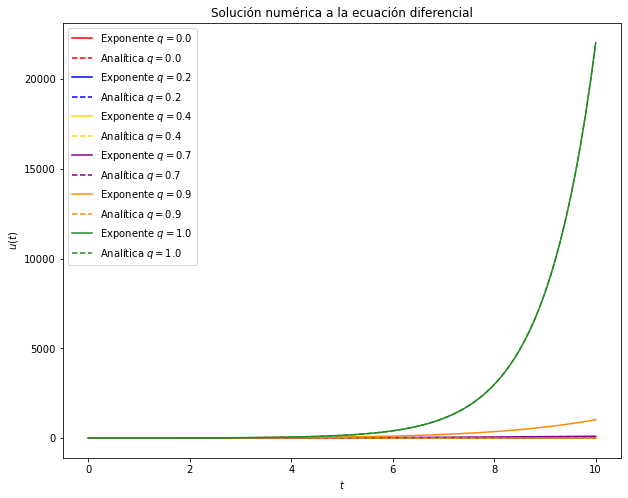

In [57]:
plt.figure(figsize=(10, 8))

for i in range(len(lista_exponentes)):
    plt.plot(t, soluciones[i], label='Exponente $q = {}$'.format(lista_exponentes[i]), color= colores[i])
    plt.plot(t, analitica(t, lista_exponentes[i]), '--', color = colores[i], label = 'Analítica $q = {}$'.format(lista_exponentes[i]))
plt.legend(loc = 'upper left')
plt.title('Solución numérica a la ecuación diferencial')
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.show()

In [ ]:
# Vemos que las gráficas analíticas coinciden casi de manera perfecta con las dadas por el método solve_ivp

In [191]:
# Ejercicio 4

TMin, TMax, N = 0.,10, 1001
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)

In [192]:
r0 = np.array([1.0,0])

In [193]:
def GetA(x):
    #return -(np.pi)**2*x
    #Pendulo
    return -x

In [194]:
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [195]:
x, v = GetLeapFrog(r0,t)

In [196]:
# Integrador simpléctico de orden 4

a = 2.**(1.0/3.0)
coeficientes = np.array([[0.5, 0.5*(1.0 - a), 0.5*(1.0 - a), 0.5], 
                         [0.0, 1.0, -a, 1.0]]) / (2.0 - a)

In [197]:
def calcular_paso(qv0, accel, h, coeffs):
    q,v = qv0
    for ai,bi in coeffs.T:
        v += bi * accel(q) * h
        q += ai * v * h
    return q,v

def cuarto_orden(qv0, accel, t, coeffs):
    N = len(t)
    h = t[1] - t[0]
    
    q = np.zeros(N, dtype='object')
    v = np.zeros(N, dtype='object')
    
    qv = qv0
    q[0] = qv0[0]
    v[0] = qv0[1]
    
    for i in range(1, len(t)):
        qv = calcular_paso(qv, accel, h, coeffs)
        q[i] = qv[0]
        v[i] = qv[1]
        
    return q,v


q, v_4 = cuarto_orden(r0, GetA, t, coeficientes)



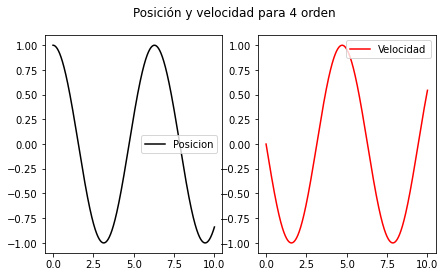

In [198]:
fig0 = plt.figure(figsize=(7,4))
fig0.suptitle('Posición y velocidad para 4 orden')
ax = fig0.add_subplot(121)
ax1 = fig0.add_subplot(122)
ax.plot(t,q, '-k',label='Posicion')
ax1.plot(t,v_4, '-r',label='Velocidad')
ax.legend(loc=0)
ax1.legend(loc=0)
plt.show()

In [199]:
# Cálculo de la energía cinética
K2 = 0.5*v**2
U2 = 0.5*x**2
E2 = K2 + U2

K4 = 0.5*v_4**2
U4 = 0.5*q**2
E4 = K4 + U4

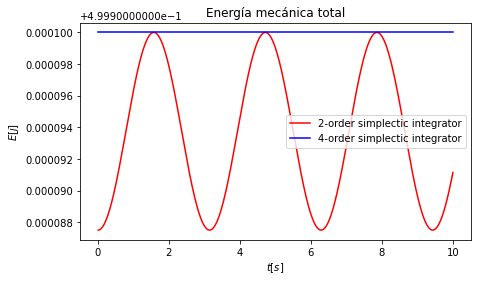

In [201]:
plt.figure(figsize=(7,4))
plt.plot(t[1:], E2,'-r', label='2-order simplectic integrator')
plt.plot(t, E4,'-b', label='4-order simplectic integrator')

plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
plt.title('Energía mecánica total')
plt.legend()
plt.xlabel('$t[s]$')
plt.ylabel('$E[j]$')
plt.show()